In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

## KNN 

In [2]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

# the target variable column is 'Target'
X = df.drop(columns=['Target'])
y = df['Target']

# Split the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Make the user intput the number of k
k = 10
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model
model.fit(X_train, y_train)

# Predict the responses for the test dataset
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy : {:.2f}%".format(accuracy_percentage))

Accuracy : 84.30%


## Naive Bayes

In [4]:
# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

# Extract features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.67%


## ensemble function to two classification algorithms

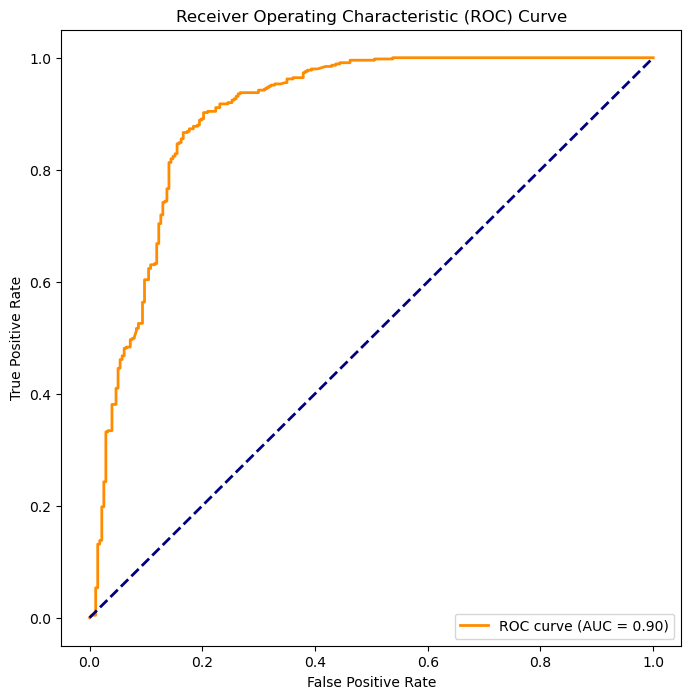

Area Under the Curve (AUC): 0.90
Ensemble Model Accuracy: 0.859504132231405


In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Convert target variable to binary values
label_binarizer = LabelBinarizer()
y_bin = label_binarizer.fit_transform(y).ravel()  # Convert to 1-dimensional array

# Split the dataset into a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Create individual classifiers
knn_clf = KNeighborsClassifier(n_neighbors=5)
nb_clf = GaussianNB()

# Create a list of tuples for the ensemble
classifiers = [('knn', knn_clf), ('nb', nb_clf)]

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=classifiers, voting='soft')

# Fit the ensemble model on the training data
ensemble_model.fit(x_train, y_train)

# Predict probabilities for the positive class on the test data
y_probs = ensemble_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Area Under the Curve (AUC): {:.2f}".format(auc))

# Make predictions on the test set
predictions = ensemble_model.predict(x_test)

# Evaluate the ensemble model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the dataset
df = pd.read_csv("filtered_student_info_dataset.csv", delimiter=",")
df = df[df["Target"].isin(["Graduate", "Dropout"])]

# Extract features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 10
knn_model = KNeighborsClassifier(n_neighbors=k)

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Create a Voting Classifier with 'hard' voting (simple majority)
ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('nb', nb_model)], voting='hard')

# Fit the individual models
knn_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train, y_train)

# Fit the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict the responses for the test dataset using individual models
y_pred_knn = knn_model.predict(X_test_scaled)
y_pred_nb = nb_model.predict(X_test)

# Predict the responses for the test dataset using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Calculate and print accuracy for individual models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")

# Calculate and print accuracy for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy_ensemble * 100:.2f}%")

# Print classification report and confusion matrix for the ensemble model
print("Classification Report (Ensemble Model):\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix (Ensemble Model):\n", confusion_matrix(y_test, y_pred_ensemble))


KNN Accuracy: 84.30%
Naive Bayes Accuracy: 85.67%
Ensemble Model Accuracy: 85.95%
Classification Report (Ensemble Model):
               precision    recall  f1-score   support

     Dropout       0.84      0.80      0.82       147
    Graduate       0.87      0.90      0.88       216

    accuracy                           0.86       363
   macro avg       0.86      0.85      0.85       363
weighted avg       0.86      0.86      0.86       363

Confusion Matrix (Ensemble Model):
 [[118  29]
 [ 22 194]]
